### Bias

In [1]:
import numpy as np

In [22]:
temps = np.random.randint(0, 100, 50).reshape(-1, 1)
temps.shape
ones = np.ones(50).reshape(-1, 1)
is_weekends = np.random.choice([0, 1], 50, p = [.75, .25]).reshape(-1, 1)
features = np.hstack((temps, is_weekends, ones))

In [24]:
params = np.array([2, 100, 5])

In [29]:
predictions = features @ params
predictions

array([197., 127.,  13.,  63., 181., 213., 159., 163., 105.,  19., 129.,
       113., 185.,  77., 147.,  37., 229.,  37., 201.,  55., 113., 193.,
        57.,  61., 149., 201., 145., 155., 257.,  35., 101., 257., 197.,
         9., 127., 193., 153., 151., 181.,  27.,  29., 237., 157., 121.,
        39.,  21., 113.,  45.,  67., 189.])

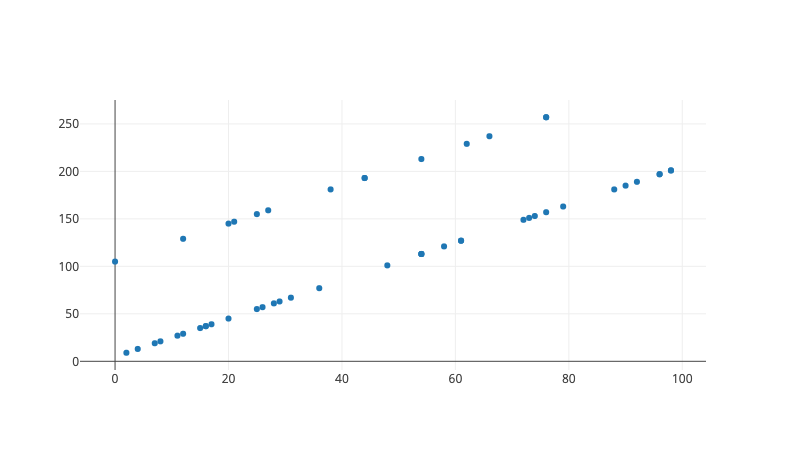

In [31]:
from graph import trace_values, plot
data_trace = trace_values(temps.reshape(50),predictions)
plot([data_trace])

In [32]:
from sklearn.linear_model import LinearRegression

In [44]:
training_features = np.hstack((temps, ones))

model = LinearRegression(fit_intercept = False)
model.fit(training_features, predictions)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [45]:
model.coef_

array([ 1.82783552, 40.8851333 ])

In [46]:
model.score(training_features, predictions)

0.5978003450737117

### Updated model

In [65]:
updated_model = LinearRegression(fit_intercept = False)
updated_model.fit(features, predictions)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [66]:
updated_model.coef_

array([  2., 100.,   5.])

In [67]:
features.shape

(50, 3)

In [69]:
updated_predictions = features @ updated_model.coef_

In [72]:
updated_predictions

array([197., 127.,  13.,  63., 181., 213., 159., 163., 105.,  19., 129.,
       113., 185.,  77., 147.,  37., 229.,  37., 201.,  55., 113., 193.,
        57.,  61., 149., 201., 145., 155., 257.,  35., 101., 257., 197.,
         9., 127., 193., 153., 151., 181.,  27.,  29., 237., 157., 121.,
        39.,  21., 113.,  45.,  67., 189.])

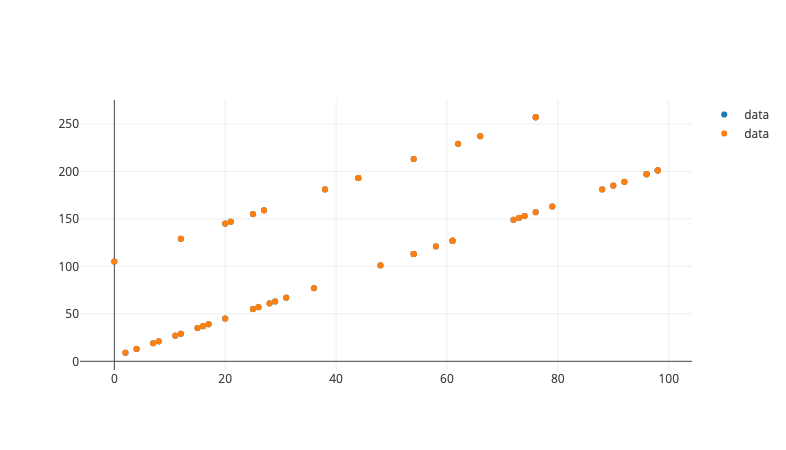

In [74]:
predictions_trace = trace_values(temps.reshape(50), updated_predictions)

plot([data_trace, predictions_trace])